Domain Semiconductor manufacturing process  

Business Context  
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system.  The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analyzing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.     

Objective  
We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyze whether all the features are required to build the model or not.   
Dataset description  
   
Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.                                                                        2  
sensor-data.csv : (1567, 592)  
The data consists of 1567 examples each with 591 features.  The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.    
Steps   
1. Import the necessary liberraries and read the provided CSV as a dataframe and perform the below steps. ( 5 points)  a. Check a few observations and shape of the dataframe b. Check for missing values. Impute the missing values if there is any c. Univariate analysis - check frequency count of target column and distribution of the first few features (sensors) d. Perform bivariate analysis and check for the correlation  e. Drop irrelevant columns   
2. Standardize the data ( 3 points)  3. Segregate the dependent column ("Pass/Fail") from the data frame. And split the dataset into training and testing set ( 70:30 split) ( 2 points) 4. Build a logistic regression, random forest, and xgboost classifier model and print confusion matrix for the test data ( 10 points)  5. Apply sampling techniques to handle the imbalanced classes ( 5 points)  6. Build a logistic regression, random forest, and xgboost classifier model after resampling the data and print the confusion matrix for the test data ( 10 points) 7. Apply Grid Search CV to get the best hyper parameters for any one of the above model  ( 5 points) 8. Build a classifier model using the above best hyper parameters and check the accuracy and confusion matrix ( 5 points) 9. Report feature importance and mention your comments ( 2 points) 
   
Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.                                                                        3 
10. Report your findings and inferences ( 3 points)     
Further Questions ( Optional) -  
1. Check for outliers and impute them as required. 2. Apply PCA to get rid of redundant features and reduce dimension of the data 3. Try cross validation techniques to get better results 4. Try OneCLassSVM model to get better recall   
Learning Outcomes  
● Feature Importance ● Sampling ● SMOTE ● Grid Search ● Random Forest ● Exploratory Data Analysis ● Logistic Regression   

In [1]:
# Widen the display of python output
# This is done to avoid ellipsis appearing which restricts output view in row or column
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
# Importing Signals Data file
# This is same as the signals dataset provided
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('../input/uci-semcom/uci-secom.csv')
dataset = pd.DataFrame(data)
dataset.head()

Time        0        1          2          3       4      5         6       7       8       9      10      11        12   13       14        15       16      17        18       19      20       21       22       23       24      25      26      27       28      29      30      31       32      33       34       35       36       37       38        39     40     41    42        43       44        45        46      47        48   49        50        51   52     53     54      55      56      57      58       59        60       61        62       63       64       65        66      67        68   69        70       71        72        73   74      75      76      77      78      79      80      81      82      83      84  85      86      87         88      89         90      91      92      93      94      95      96   97      98      99     100     101     102     103     104     105     106     107     108  109  110  111     112     113  114       115     116  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN       NaN  0.0  0.0126 -0.0206  0.0141 -0.0307 -0.0083 -0.0026 -0.0567 -0.0044  7.2163  0.1320 NaN  2.3895  0.9690  1747.6049  0.1841  8671.9301 -0.3274 -0.0055 -0.0001  0.0001  0.0003 -0.2786  0.0  0.3974 -0.0251  0.0002  0.0002  0.1350 -0.0042  0.0003  0.0056  0.0000 -0.2468  0.3196  NaN  NaN  NaN     NaN  0.9460  0.0  748.6115  0.9908   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN       NaN  0.0 -0.0039 -0.0198  0.0004 -0.0440 -0.0358 -0.0120 -0.0377  0.0017  6.8043  0.1358 NaN  2.3754  0.9894  1931.6464  0.1874  8407.0299  0.1455 -0.0015  0.0000 -0.0005  0.0001  0.5854  0.0 -0.9353 -0.0158 -0.0004 -0.0004 -0.0752 -0.0045  0.0002  0.0015  0.0000  0.0772 -0.0903  NaN  NaN  NaN     NaN  0.9425  0.0  731.2517  0.9902   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972  485.2665  0.0 -0.0078 -0.0326 -0.0052  0.0213 -0.0054 -0.1134 -0.0182  0.0287  7.1041  0.1362 NaN  2.4532  0.9880  1685.8514  0.1497  9317.1698  0.0553  0.0006 -0.0013  0.0000  0.0002 -0.1343  0.0 -0.1427  0.1218  0.0006 -0.0001  0.0134 -0.0026 -0.0016 -0.0006  0.0013 -0.0301 -0.0728  NaN  NaN  NaN  0.4684  0.9231  0.0  718.5777  0.9899   
3  2008-07-19 14:43:00  2988.72  2479.90  

In [3]:
#Dataset has 1,567 rows and 592 columns
dataset.shape

(1567, 592)

In [4]:
#Add a prefix to the column names for easeof understanding
dataset.columns = 'feature_' + dataset.columns

In [5]:
#Rename the time column and Pass_Fail column as they are not features 
dataset.rename(columns = {'feature_Time':'Time'}, inplace = True) 
dataset.rename(columns = {'feature_Pass/Fail':'Pass_Fail'}, inplace = True)

In [6]:
#All variables except Pass/Fail (Wether the process entity passed or not) is float. 
#Pass/Fail is a integer variable
dataset.dtypes

Time            object
feature_0      float64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
feature_6      float64
feature_7      float64
feature_8      float64
feature_9      float64
feature_10     float64
feature_11     float64
feature_12     float64
feature_13     float64
feature_14     float64
feature_15     float64
feature_16     float64
feature_17     float64
feature_18     float64
feature_19     float64
feature_20     float64
feature_21     float64
feature_22     float64
feature_23     float64
feature_24     float64
feature_25     float64
feature_26     float64
feature_27     float64
feature_28     float64
feature_29     float64
feature_30     float64
feature_31     float64
feature_32     float64
feature_33     float64
feature_34     float64
feature_35     float64
feature_36     float64
feature_37     float64
feature_38     float64
feature_39     float64
feature_40     float64
feature_41     float64
feature_42 

In [7]:
#5 number summary of the columns 
#The counts are varying for each feature so there might be issues with some of the values like missing values
#Few variables like feature_586 etc have negative values as well
#There also appears to be several features with outliers as there is significant 
#difference between 75% and max value
dataset.describe().transpose()

count         mean          std         min          25%         50%          75%         max
feature_0    1561.0  3014.452896    73.621787   2743.2400  2966.260000  3011.49000  3056.650000   3356.3500
feature_1    1560.0  2495.850231    80.407705   2158.7500  2452.247500  2499.40500  2538.822500   2846.4400
feature_2    1553.0  2200.547318    29.513152   2060.6600  2181.044400  2201.06670  2218.055500   2315.2667
feature_3    1553.0  1396.376627   441.691640      0.0000  1081.875800  1285.21440  1591.223500   3715.0417
feature_4    1553.0     4.197013    56.355540      0.6815     1.017700     1.31680     1.525700   1114.5366
feature_5    1553.0   100.000000     0.000000    100.0000   100.000000   100.00000   100.000000    100.0000
feature_6    1553.0   101.112908     6.237214     82.1311    97.920000   101.51220   104.586700    129.2522
feature_7    1558.0     0.121822     0.008961      0.0000     0.121100     0.12240     0.123800      0.1286
feature_8    1565.0     1.462862     0.073897      1.1910     1.411200     1.46160     1.516900      1.6564
feature_9    1565.0    -0.000841     0.015116     -0.0534    -0.010800    -0.00130     0.008400      0.0749
feature_10   1565.0     0.000146     0.009302     -0.0349    -0.005600     0.00040     0.005900      0.0530
feature_11   1565.0     0.964353     0.012452      0.6554     0.958100     0.96580     0.971300      0.9848
feature_12   1565.0   199.956809     3.257276    182.0940   198.130700   199.53560   202.007100    272.0451
feature_13   1564.0     0.000000     0.000000      0.0000     0.000000     0.00000     0.000000      0.0000
feature_14   1564.0     9.005371     2.796596      2.2493     7.094875     8.96700    10.861875     19.5465
feature_15   1564.0   413.086035    17.221095    333.4486   406.127400   412.21910   419.089275    824.9271
feature_16   1564.0     9.907603     2.403867      4.4696     9.567625     9.85175    10.128175    102.8677
feature_17   1564.0     0.971444     0.012062      0.5794     0.968200     0.97260     0.976800      0.9848
feature_18   1564.0   190.047354     2.781041    169.1774   188.299825   189.66420   192.189375    215.5977
feature_19   1557.0    12.481034     0.217965      9.8773    12.460000    12.49960    12.547100     12.9898
feature_20   1567.0     1.405054     0.016737      1.1797     1.396500     1.40600     1.415000      1.4534
feature_21   1565.0 -5618.393610   626.822178  -7150.2500 -5933.250000 -5523.25000 -5356.250000      0.0000
feature_22   1565.0  2699.378435   295.498535      0.0000  2578.000000  2664.00000  2841.750000   3656.2500
feature_23   1565.0 -3806.299734  1380.162148  -9986.7500 -4371.750000 -3820.75000 -3352.750000   2363.0000
feature_24   1565.0  -298.598136  2902.690117 -14804.5000 -1476.000000   -78.75000  1377.250000  14106.0000
feature_25   1565.0     1.203845     0.177600      0.0000     1.094800     1.28300     1.304300      1.3828
feature_26   1565.0     1.938477     0.189495      0.0000     1.906500     1.98650     2.003200      2.0528
feature_27   1565.0     6.638628     1.244249      0.0000     5.263700     7.26470     7.329700      7.6588
feature_28   1565.0    69.499532     3.461181     59.4000    67.377800    69.15560    72.266700     77.9000
feature_29   1565.0     2.366197     0.408694      0.6667     2.088900     2.37780     2.655600      3.5111
feature_30   1565.0     0.184159     0.032944      0.0341     0.161700     0.18670     0.207100      0.2851
feature_31   1565.0     3.673189     0.535322      2.0698     3.362700     3.43100     3.531300      4.8044
feature_32   1566.0    85.337469     2.026549     83.1829    84.490500    85.13545    85.741900    105.6038
feature_33   1566.0     8.960279     1.344456      7.6032     8.580000     8.76980     9.060600     23.3453
feature_34   1566.0    50.582639     1.182618     49.8348    50.252350    50.39640    50.578800     59.7711
feature_35   1566.0    64.555787     2.574749     63.6774    64.024800    64.16580    64.344700     94.2641
feature_36   1566.

In [8]:
#Check for null values - Most of the features are having null values
dataset.isnull().sum()

Time              0
feature_0         6
feature_1         7
feature_2        14
feature_3        14
feature_4        14
feature_5        14
feature_6        14
feature_7         9
feature_8         2
feature_9         2
feature_10        2
feature_11        2
feature_12        2
feature_13        3
feature_14        3
feature_15        3
feature_16        3
feature_17        3
feature_18        3
feature_19       10
feature_20        0
feature_21        2
feature_22        2
feature_23        2
feature_24        2
feature_25        2
feature_26        2
feature_27        2
feature_28        2
feature_29        2
feature_30        2
feature_31        2
feature_32        1
feature_33        1
feature_34        1
feature_35        1
feature_36        1
feature_37        1
feature_38        1
feature_39        1
feature_40       24
feature_41       24
feature_42        1
feature_43        1
feature_44        1
feature_45        1
feature_46        1
feature_47        1
feature_48        1


In [9]:
#Check for NA values - Most of the features are having NA values
dataset.isna().sum()

Time              0
feature_0         6
feature_1         7
feature_2        14
feature_3        14
feature_4        14
feature_5        14
feature_6        14
feature_7         9
feature_8         2
feature_9         2
feature_10        2
feature_11        2
feature_12        2
feature_13        3
feature_14        3
feature_15        3
feature_16        3
feature_17        3
feature_18        3
feature_19       10
feature_20        0
feature_21        2
feature_22        2
feature_23        2
feature_24        2
feature_25        2
feature_26        2
feature_27        2
feature_28        2
feature_29        2
feature_30        2
feature_31        2
feature_32        1
feature_33        1
feature_34        1
feature_35        1
feature_36        1
feature_37        1
feature_38        1
feature_39        1
feature_40       24
feature_41       24
feature_42        1
feature_43        1
feature_44        1
feature_45        1
feature_46        1
feature_47        1
feature_48        1


In [10]:
#fill NA with zero of each column in signal dataset for missing value imputation
#this shows that we did not have any signal from that feature
df = dataset.iloc[:,1:]
df = df.apply(lambda x: x.fillna(0),axis=0)

In [11]:
df2 = dataset.iloc[:,0]
result = pd.concat([df, df2], axis=1).reindex(df.index)

In [12]:
#Some features seem to have the same values throughout for example feature_5
#We would need to drop such features and those which are highly correlated to each other in future steps
result.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  feature_48  feature_49  feature_50  feature_51  feature_52  feature_53  feature_54  feature_55  feature_56  feature_57  feature_58  feature_59  feature_60  feature_61  feature_62  feature_63  feature_64  feature_65  feature_66  feature_67  feature_68  feature_69  feature_70  feature_71  feature_72  feature_73  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602      100.0    97.6133     0.1242     1.5005     0.0162     -0.0034      0.9455    202.4396         0.0      7.9558    414.8710     10.0433      0.9680    192.3963     12.5190      1.4026    -5419.00     2916.50    -4043.75      751.00      0.8955      1.7730      3.0490     64.2333      2.0222      0.1632      3.5191     83.3971      9.5126     50.6170     64.2588     49.3830     66.3141     86.9555    117.5132       61.29       4.515        70.0    352.7173     10.1841    130.3691    723.3092      1.3072    141.2282         1.0    624.3145    218.3174         0.0       4.592       4.841      2834.0      0.9317      0.9484      4.7057     -1.7264    350.9264     10.6231    108.6427     16.1445     21.7264     29.5367    693.7724      0.9226    148.6009         1.0    608.1700     84.0793      0.0000      0.0000         0.0      0.0126     -0.0206      0.0141     -0.0307     -0.0083     -0.0026     -0.0567     -0.0044   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294      100.0   102.3433     0.1247     1.4966    -0.0005     -0.0148      0.9627    200.5470         0.0     10.1548    414.7347      9.2599      0.9701    191.2872     12.4608      1.3825    -5441.50     2604.25    -3498.75    -1640.25      1.2973      2.0143      7.3900     68.4222      2.2667      0.2102      3.4171     84.9052      9.7997     50.6596     64.2828     49.3404     64.9193     87.5241    118.1188       78.25       2.773        70.0    352.2445     10.0373    133.1727    724.8264      1.2887    145.8445         1.0    631.2618    205.1695         0.0       4.590       4.842      2853.0      0.9324      0.9479      4.6820      0.8073    352.0073     10.3092    113.9800     10.9036     19.1927     27.6301    697.1964      1.1598    154.3709         1.0    620.3582     82.3494      0.0000      0.0000         0.0     -0.0039     -0.0198      0.0004     -0.0440     -0.0358     -0.0120     -0.0377      0.0017   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102      100.0    95.4878     0.1241     1.4436     0.0041      0.0013      0.9615    202.0179         0.0      9.5157    416.7075      9.3144      0.9674    192.7035     12.5404      1.4123    -5447.75     2701.75    -4047.00    -1916.50      1.3122      2.0295      7.5788     67.1333      2.3333      0.1734      3.5986     84.7569      8.6590     50.1530     64.1114     49.8470     65.8389     84.7327    118.6128       14.37       5.434        70.0    364.3782      9.8783    131.8027    734.7924      1.2992    141.0845         1.0    637.2655    185.7574         0.0       4.486       4.748      2936.0      0.9139      0.9447      4.5873     23.8245    364.5364     10.1685    115.6273     11.3019     16.1755     24.2829    710.5095      0.8694    145.8000         1.0    625.9636     84.7681    140.6972    485.2665         0.0     -0.0078     -0.0326     -0.0052      0.0213     -0.0054     -0.1134     -0.0182      0.0287   
3    2988.72    2479.90  2199.0333   90

In [13]:
#We can see that all the NA values are removed now from the dataframe
result.isna().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57     0
feature_58    

In [14]:
#We can see that all the null values are also removed now from the dataframe
result.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
feature_28     0
feature_29     0
feature_30     0
feature_31     0
feature_32     0
feature_33     0
feature_34     0
feature_35     0
feature_36     0
feature_37     0
feature_38     0
feature_39     0
feature_40     0
feature_41     0
feature_42     0
feature_43     0
feature_44     0
feature_45     0
feature_46     0
feature_47     0
feature_48     0
feature_49     0
feature_50     0
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57     0
feature_58    

In [15]:
#The classes for Pass_Fail variable are not balanced - 93.4% observations are passed  
#while 6.6% people are failed. 
#So if an alogrithm just assigns value as -1 to all observations, it will still achieve 93.4% accuracy, 
#So our selected model should have better accuracy than 93.4% to be called a good model 
result["Pass_Fail"].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass_Fail, dtype: float64

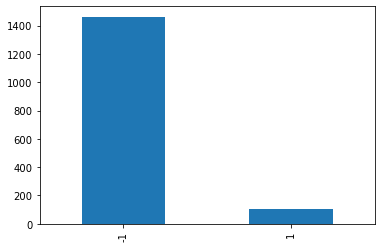

In [16]:
#The bar plot below also shows us that the classes are not balanced
result["Pass_Fail"].value_counts().plot(kind="bar");

In [17]:
# Get the correlation matrix
corr = result.corr()
#sns.heatmap(corr,annot=True);
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
#    f, ax = plt.subplots(figsize=(20, 20))
#    ax = sns.heatmap(corr, mask=mask, vmax=.3, annot=True, square=True);

In [18]:
print(corr)

             feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  feature_48  feature_49  feature_50  feature_51  feature_52    feature_53  feature_54  feature_55  feature_56  feature_57  feature_58  feature_59  feature_60  feature_61  feature_62  feature_63  feature_64  feature_65  feature_66  feature_67  feature_68  feature_69  feature_70  feature_71  feature_72  feature_73  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  \
feature_0

In [19]:
#Since the correlation is very big to view here so have exported as csv file
corr.to_csv("correlation.csv")

In [20]:
#Based on the correlation excel, a lot of columns are having same value through and no variance
#These are shown as blank values in the correlation excel
#Removing such columns from the dataframe below - About 116 columns are blank
result.drop(['feature_5','feature_13','feature_42','feature_49','feature_52','feature_69','feature_97','feature_141',
             'feature_149','feature_178','feature_179','feature_186','feature_189','feature_190','feature_191','feature_192',
             'feature_193','feature_194','feature_226','feature_229','feature_230','feature_231','feature_232','feature_233',
             'feature_234','feature_235','feature_236','feature_237','feature_240','feature_241','feature_242','feature_243',
             'feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263',
             'feature_264','feature_265','feature_266','feature_276','feature_284','feature_313','feature_314','feature_315',
             'feature_322','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_364',
             'feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_378',
             'feature_379','feature_380','feature_381','feature_394','feature_395','feature_396','feature_397','feature_398',
             'feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_414','feature_422',
             'feature_449','feature_450','feature_451','feature_458','feature_461','feature_462','feature_463','feature_464',
             'feature_465','feature_466','feature_481','feature_498','feature_501','feature_502','feature_503','feature_504',
             'feature_505','feature_506','feature_507','feature_508','feature_509','feature_512','feature_513','feature_514',
             'feature_515','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534',
             'feature_535','feature_536','feature_537','feature_538'],axis=1,inplace=True)

In [21]:
#Remove the highly collinear features from results dataframe
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [22]:
#Remove columns having more than 70% correlation
#Both positive and negative correlations are considered here
result = remove_collinear_features(result,0.70)

feature_6 | feature_2 | 0.82
feature_7 | feature_2 | 0.75
feature_12 | feature_11 | 0.83
feature_17 | feature_11 | 0.81
feature_18 | feature_11 | 0.72
feature_18 | feature_12 | 0.79
feature_18 | feature_17 | 0.9
feature_22 | feature_21 | 0.75
feature_26 | feature_25 | 0.83
feature_27 | feature_25 | 0.98
feature_27 | feature_26 | 0.79
feature_30 | feature_29 | 0.86
feature_34 | feature_32 | 0.88
feature_35 | feature_34 | 0.83
feature_37 | feature_32 | 0.75
feature_37 | feature_34 | 0.75
feature_38 | feature_32 | 0.72
feature_38 | feature_34 | 0.72
feature_38 | feature_36 | 0.71
feature_38 | feature_37 | 0.97
feature_39 | feature_32 | 0.81
feature_39 | feature_34 | 0.91
feature_39 | feature_35 | 0.71
feature_39 | feature_37 | 0.86
feature_39 | feature_38 | 0.84
feature_46 | feature_43 | 0.84
feature_46 | feature_45 | 0.74
feature_48 | feature_44 | 0.77
feature_50 | feature_43 | 0.9
feature_50 | feature_46 | 0.97
feature_51 | feature_47 | 0.71
feature_54 | feature_53 | 1.0
feature_55 | fe

feature_334 | feature_196 | 0.75
feature_334 | feature_197 | 0.78
feature_334 | feature_198 | 0.99
feature_334 | feature_199 | 0.75
feature_334 | feature_204 | 0.7
feature_334 | feature_205 | 0.76
feature_334 | feature_207 | 0.73
feature_334 | feature_332 | 0.73
feature_334 | feature_333 | 0.8
feature_335 | feature_67 | 0.85
feature_335 | feature_196 | 0.93
feature_335 | feature_197 | 0.86
feature_335 | feature_199 | 0.96
feature_335 | feature_203 | 0.72
feature_335 | feature_204 | 0.79
feature_335 | feature_205 | 0.85
feature_335 | feature_207 | 0.9
feature_335 | feature_332 | 0.96
feature_335 | feature_333 | 0.86
feature_335 | feature_334 | 0.74
feature_336 | feature_67 | 0.87
feature_336 | feature_196 | 0.91
feature_336 | feature_197 | 0.9
feature_336 | feature_198 | 0.7
feature_336 | feature_199 | 0.88
feature_336 | feature_203 | 0.72
feature_336 | feature_204 | 0.81
feature_336 | feature_205 | 0.88
feature_336 | feature_207 | 0.9
feature_336 | feature_332 | 0.94
feature_336 | feat

feature_434 | feature_431 | 0.93
feature_435 | feature_26 | 0.77
feature_435 | feature_159 | 0.71
feature_435 | feature_163 | 0.84
feature_435 | feature_164 | 0.91
feature_435 | feature_165 | 0.87
feature_435 | feature_294 | 0.75
feature_435 | feature_298 | 0.86
feature_435 | feature_299 | 0.9
feature_435 | feature_300 | 0.86
feature_435 | feature_430 | 0.95
feature_435 | feature_431 | 0.93
feature_435 | feature_434 | 0.99
feature_436 | feature_26 | 0.76
feature_436 | feature_159 | 0.71
feature_436 | feature_163 | 0.84
feature_436 | feature_164 | 0.9
feature_436 | feature_165 | 0.88
feature_436 | feature_294 | 0.75
feature_436 | feature_298 | 0.86
feature_436 | feature_299 | 0.9
feature_436 | feature_300 | 0.87
feature_436 | feature_430 | 0.95
feature_436 | feature_431 | 0.93
feature_436 | feature_434 | 0.99
feature_436 | feature_435 | 1.0
feature_437 | feature_166 | 0.99
feature_437 | feature_301 | 0.95
feature_439 | feature_168 | 0.79
feature_439 | feature_303 | 0.77
feature_440 | fe

feature_552 | feature_546 | 0.73
feature_552 | feature_549 | 1.0
feature_553 | feature_547 | 0.82
feature_553 | feature_548 | 0.82
feature_553 | feature_550 | 0.99
feature_554 | feature_551 | 1.0
feature_555 | feature_549 | 0.89
feature_555 | feature_552 | 0.89
feature_556 | feature_547 | 0.8
feature_556 | feature_548 | 0.8
feature_556 | feature_550 | 1.0
feature_556 | feature_553 | 0.99
feature_557 | feature_551 | 1.0
feature_557 | feature_554 | 1.0
feature_560 | feature_559 | 0.89
feature_561 | feature_559 | 0.98
feature_561 | feature_560 | 0.82
feature_563 | feature_562 | 0.91
feature_564 | feature_562 | 0.72
feature_564 | feature_563 | 0.72
feature_566 | feature_562 | 0.73
feature_566 | feature_563 | 0.72
feature_566 | feature_564 | 0.99
feature_567 | feature_563 | 0.7
feature_567 | feature_565 | 0.99
feature_568 | feature_562 | 0.72
feature_568 | feature_563 | 0.72
feature_568 | feature_564 | 1.0
feature_568 | feature_566 | 0.99
feature_569 | feature_565 | 0.96
feature_569 | featu

In [23]:
result.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_8  feature_9  feature_10  feature_11  feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  feature_23  feature_24  feature_25  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_47  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  feature_99  feature_100  feature_102  feature_103  feature_107  feature_108  feature_109  feature_112  feature_113  feature_114  feature_115  feature_116  feature_117  feature_118  feature_119  feature_120  feature_121  feature_122  feature_126  feature_129  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602     1.5005     0.0162     -0.0034      0.9455      7.9558    414.8710     10.0433     12.5190      1.4026    -5419.00    -4043.75      751.00      0.8955     64.2333      2.0222      3.5191     83.3971      9.5126     49.3830       61.29       4.515    352.7173     10.1841    130.3691      1.3072       4.592     -1.7264    350.9264    108.6427     16.1445     21.7264      0.9226     84.0793      0.0000         0.0      0.0126     -0.0206      0.0141     -0.0307     -0.0083     -0.0026     -0.0567     -0.0044      7.2163      0.1320         0.0      2.3895      0.9690   1747.6049      0.1841   8671.9301     -0.3274     -0.0055     -0.0001      0.0001      0.0003     -0.0251       0.0002       0.1350      -0.0042      -0.2468       0.3196          0.0       0.0000       0.9460          0.0     748.6115       0.9908      58.4306       0.6002       0.9804       6.3788        15.88        2.639        3.353      -0.0473   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294     1.4966    -0.0005     -0.0148      0.9627     10.1548    414.7347      9.2599     12.4608      1.3825    -5441.50    -3498.75    -1640.25      1.2973     68.4222      2.2667      3.4171     84.9052      9.7997     49.3404       78.25       2.773    352.2445     10.0373    133.1727      1.2887       4.590      0.8073    352.0073    113.9800     10.9036     19.1927      1.1598     82.3494      0.0000         0.0     -0.0039     -0.0198      0.0004     -0.0440     -0.0358     -0.0120     -0.0377      0.0017      6.8043      0.1358         0.0      2.3754      0.9894   1931.6464      0.1874   8407.0299      0.1455     -0.0015      0.0000     -0.0005      0.0001     -0.0158      -0.0004      -0.0752      -0.0045       0.0772      -0.0903          0.0       0.0000       0.9425          0.0     731.2517       0.9902      58.6680       0.5958       0.9731       6.5061        15.88        2.541        2.771      -0.0946   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102     1.4436     0.0041      0.0013      0.9615      9.5157    416.7075      9.3144     12.5404      1.4123    -5447.75    -4047.00    -1916.50      1.3122     67.1333      2.3333      3.5986     84.7569      8.6590     49.8470       14.37       5.434    364.3782      9.8783    131.8027      1.2992       4.486     23.8245    364.5364    115.6273     11.3019     16.1755      0.8694     84.7681    140.6972         0.0     -0.0078     -0.0326     -0.0052      0.0213     -0.0054     -0.1134     -0.0182      0.0287      7.1041      0.1362         0.0      2.4532      0.9880   1685.8514      0.1497   9317.1698      0.0553      0.0006     -0.0013      0.0000      0.0002      0.1218       0.0006       0.0134      -0.0026      -0.0301      -0.0728          0.0       0.4684       0.9231          0.0     718.5777       0.9899      58.4808       0.6015       0.9772       6.4527        15.90        2.882        3.094      -0.1892   
3    2988.72    2479.90  2199.0333   909.7926  

In [24]:
#After dropping the highly correlated variables we have 197 columns and 1,567 rows
result.shape

(1567, 197)

In [25]:
#Observation is that most of the variables distribution are right skewed with long tails and outliers 
#

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=(20,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()


#test = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))
#Most the variables are approximately normally distributed except for feature_4, feature_7,
#feature_11, feature_12, feature_15, feature_16
draw_histograms(result, result.iloc[:,0:15], 5, 3)

In [26]:
result.Time.dtype

dtype('O')

In [27]:
from datetime import datetime
result['year'] = pd.DatetimeIndex(result['Time']).year
result['month'] = pd.DatetimeIndex(result['Time']).month
result['date'] = pd.DatetimeIndex(result['Time']).day
result['week_day'] = pd.DatetimeIndex(result['Time']).weekday
result['start_time'] = pd.DatetimeIndex(result['Time']).time
result['hour'] = pd.DatetimeIndex(result['Time']).hour
result['min'] = pd.DatetimeIndex(result['Time']).minute

In [28]:
result.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_8  feature_9  feature_10  feature_11  feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  feature_23  feature_24  feature_25  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_47  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  feature_99  feature_100  feature_102  feature_103  feature_107  feature_108  feature_109  feature_112  feature_113  feature_114  feature_115  feature_116  feature_117  feature_118  feature_119  feature_120  feature_121  feature_122  feature_126  feature_129  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602     1.5005     0.0162     -0.0034      0.9455      7.9558    414.8710     10.0433     12.5190      1.4026    -5419.00    -4043.75      751.00      0.8955     64.2333      2.0222      3.5191     83.3971      9.5126     49.3830       61.29       4.515    352.7173     10.1841    130.3691      1.3072       4.592     -1.7264    350.9264    108.6427     16.1445     21.7264      0.9226     84.0793      0.0000         0.0      0.0126     -0.0206      0.0141     -0.0307     -0.0083     -0.0026     -0.0567     -0.0044      7.2163      0.1320         0.0      2.3895      0.9690   1747.6049      0.1841   8671.9301     -0.3274     -0.0055     -0.0001      0.0001      0.0003     -0.0251       0.0002       0.1350      -0.0042      -0.2468       0.3196          0.0       0.0000       0.9460          0.0     748.6115       0.9908      58.4306       0.6002       0.9804       6.3788        15.88        2.639        3.353      -0.0473   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294     1.4966    -0.0005     -0.0148      0.9627     10.1548    414.7347      9.2599     12.4608      1.3825    -5441.50    -3498.75    -1640.25      1.2973     68.4222      2.2667      3.4171     84.9052      9.7997     49.3404       78.25       2.773    352.2445     10.0373    133.1727      1.2887       4.590      0.8073    352.0073    113.9800     10.9036     19.1927      1.1598     82.3494      0.0000         0.0     -0.0039     -0.0198      0.0004     -0.0440     -0.0358     -0.0120     -0.0377      0.0017      6.8043      0.1358         0.0      2.3754      0.9894   1931.6464      0.1874   8407.0299      0.1455     -0.0015      0.0000     -0.0005      0.0001     -0.0158      -0.0004      -0.0752      -0.0045       0.0772      -0.0903          0.0       0.0000       0.9425          0.0     731.2517       0.9902      58.6680       0.5958       0.9731       6.5061        15.88        2.541        2.771      -0.0946   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102     1.4436     0.0041      0.0013      0.9615      9.5157    416.7075      9.3144     12.5404      1.4123    -5447.75    -4047.00    -1916.50      1.3122     67.1333      2.3333      3.5986     84.7569      8.6590     49.8470       14.37       5.434    364.3782      9.8783    131.8027      1.2992       4.486     23.8245    364.5364    115.6273     11.3019     16.1755      0.8694     84.7681    140.6972         0.0     -0.0078     -0.0326     -0.0052      0.0213     -0.0054     -0.1134     -0.0182      0.0287      7.1041      0.1362         0.0      2.4532      0.9880   1685.8514      0.1497   9317.1698      0.0553      0.0006     -0.0013      0.0000      0.0002      0.1218       0.0006       0.0134      -0.0026      -0.0301      -0.0728          0.0       0.4684       0.9231          0.0     718.5777       0.9899      58.4808       0.6015       0.9772       6.4527        15.90        2.882        3.094      -0.1892   
3    2988.72    2479.90  2199.0333   909.7926  

In [29]:
#This consists of only year 2008
result.year.unique()

array([2008])

In [30]:
#This consists of all the months of 2008
result.month.unique()

array([ 7,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [31]:
#All the dates of the month are not there, might be related to production on certain days only
result.date.unique()

array([19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31,  8, 13, 15, 16, 17, 18,
       24,  9, 14, 26, 10])

In [32]:
#All the weekdays of the month are here, so production happens on all 7 days
#0 stand for Sunday, 1 for Monday ... 6 for Saturday
result.week_day.unique()

array([5, 6, 0, 1, 2, 4, 3])

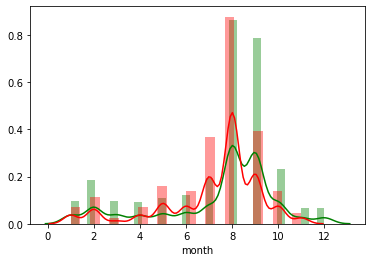

In [33]:
#We see that the failures (Pass_Fail=1) peak in August which is also the peak for pass.
#August and September are months with most product and most failures as well
#The failures seem to subside from September onwards post some correction 
#(May-Aug we see more failures than passes)
sns.distplot( result[result.Pass_Fail == -1]['month'], color = 'g');
sns.distplot( result[result.Pass_Fail == 1]['month'], color = 'r');

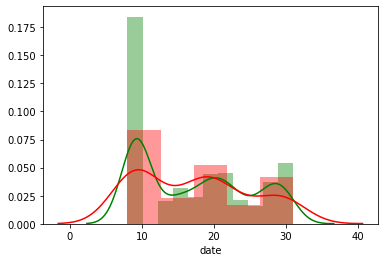

In [34]:
#The failures tend to decrease towards month end and is in close sync with pass population
sns.distplot( result[result.Pass_Fail == -1]['date'], color = 'g');
sns.distplot( result[result.Pass_Fail == 1]['date'], color = 'r');

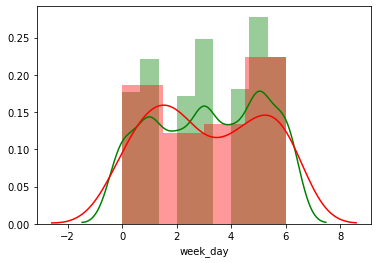

In [35]:
#Failures appear to be more towards start and end of the week rather than in the middle of the week
sns.distplot( result[result.Pass_Fail == -1]['week_day'], color = 'g');
sns.distplot( result[result.Pass_Fail == 1]['week_day'], color = 'r');

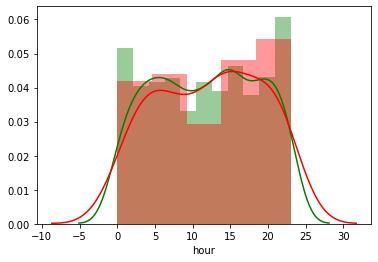

In [36]:
#There is no specific trend in terms of hours, it seems to be fairly distributed
sns.distplot( result[result.Pass_Fail == -1]['hour'], color = 'g');
sns.distplot( result[result.Pass_Fail == 1]['hour'], color = 'r');

In [37]:
#There is no specific trend in terms of minutes, it seems to be fairly distributed
sns.distplot( result[result.Pass_Fail == -1]['min'], color = 'g');
sns.distplot( result[result.Pass_Fail == 1]['min'], color = 'r');

In [38]:
#Pairplot of the dataset without name and status columns
#Most of the independent variables have a positive skew
#sns.pairplot(dataset3);

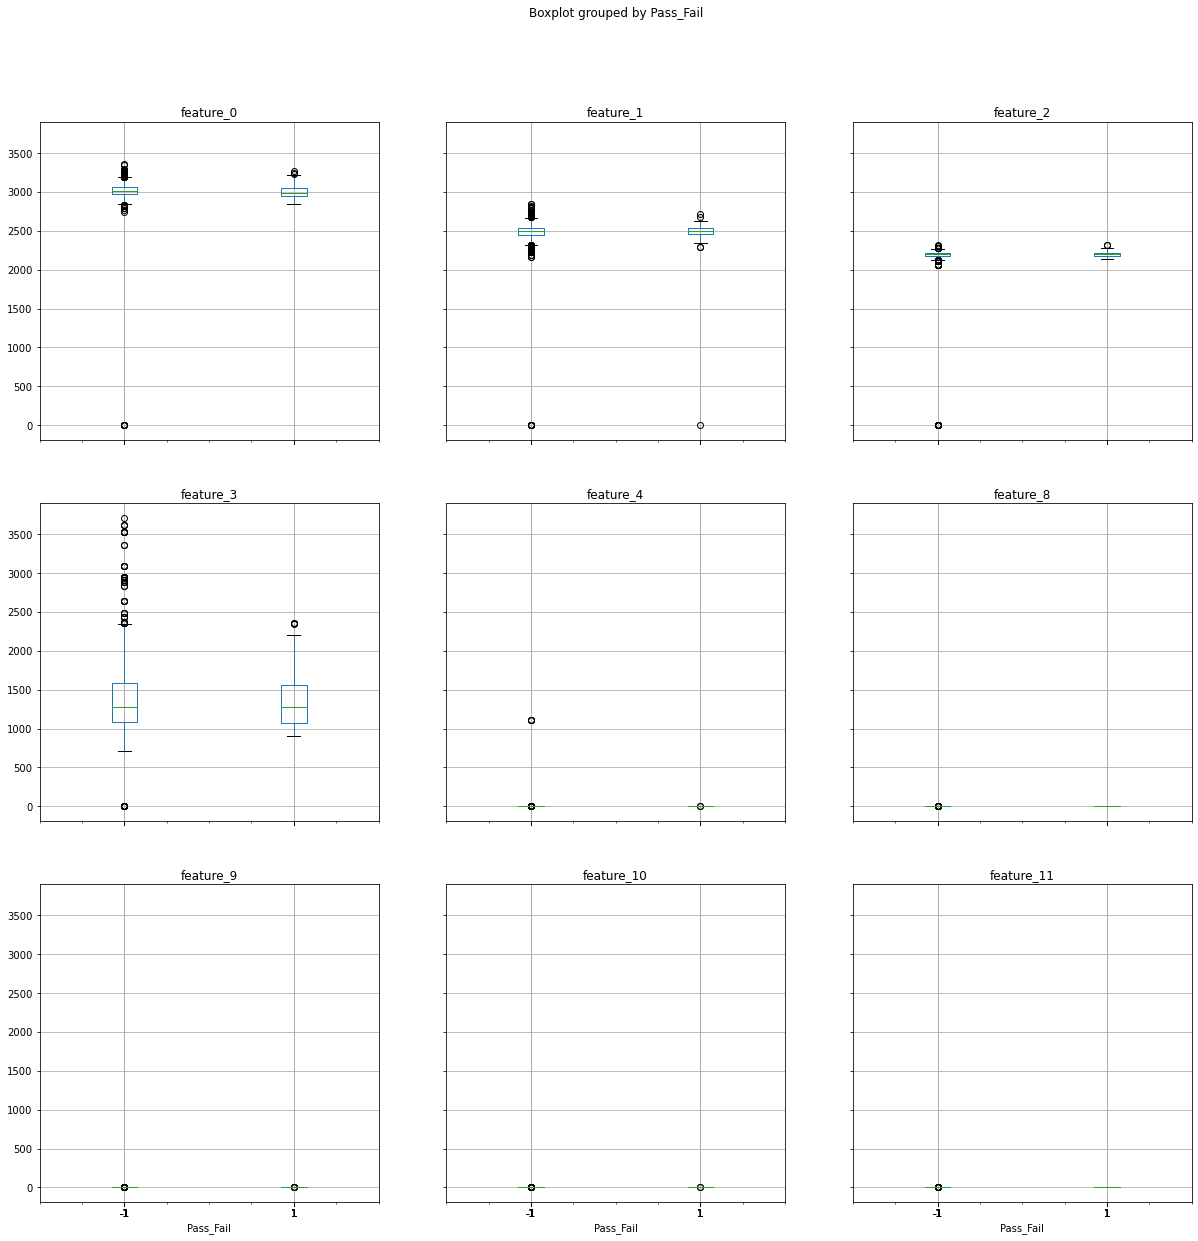

In [39]:
# Create a boxplot for all the features by target (Pass_Fail) column
# One common observation is that almost all have outliers, so outlier removal/correction 
# will be required in future steps
# we see certain features with very less observations like feature 4, 8, 9, 10, 11
result.boxplot(column = ['feature_0',
'feature_1',
'feature_2',
'feature_3',
'feature_4',
'feature_8',
'feature_9',
'feature_10',
'feature_11'
], by='Pass_Fail', figsize = (20,20));


In [40]:
#There appears to be very low variation in the features, so we can drop such features
result["feature_11"].unique()

array([0.9455, 0.9627, 0.9615, 0.9629, 0.9569, 0.9699, 0.9591, 0.9481,
       0.9494, 0.944 , 0.9433, 0.9445, 0.9595, 0.9441, 0.9582, 0.9616,
       0.9623, 0.9613, 0.9634, 0.9614, 0.9587, 0.9617, 0.9491, 0.9638,
       0.9765, 0.958 , 0.9572, 0.9589, 0.962 , 0.9515, 0.9581, 0.9721,
       0.9757, 0.9517, 0.9651, 0.9665, 0.9605, 0.9691, 0.9534, 0.9542,
       0.9611, 0.9625, 0.9493, 0.948 , 0.9606, 0.9487, 0.9453, 0.9527,
       0.9439, 0.9574, 0.9537, 0.9667, 0.9644, 0.9755, 0.9649, 0.9682,
       0.9679, 0.9696, 0.9663, 0.9671, 0.968 , 0.9653, 0.9556, 0.9642,
       0.9536, 0.9511, 0.9528, 0.9681, 0.9584, 0.9558, 0.9645, 0.9489,
       0.9609, 0.9673, 0.9631, 0.9612, 0.9477, 0.9549, 0.977 , 0.9648,
       0.9563, 0.9598, 0.9646, 0.956 , 0.9561, 0.951 , 0.9539, 0.9501,
       0.9689, 0.9668, 0.964 , 0.9424, 0.9661, 0.9659, 0.9492, 0.9496,
       0.9438, 0.9657, 0.9662, 0.9522, 0.9669, 0.9636, 0.9742, 0.9666,
       0.9514, 0.9557, 0.9513, 0.9802, 0.9602, 0.9725, 0.9624, 0.9533,
      

In [41]:
result_num = result.drop(['Pass_Fail','Time','start_time'],axis=1)

In [42]:
#Contains all the features
result_num.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_8  feature_9  feature_10  feature_11  feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  feature_23  feature_24  feature_25  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_47  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  feature_99  feature_100  feature_102  feature_103  feature_107  feature_108  feature_109  feature_112  feature_113  feature_114  feature_115  feature_116  feature_117  feature_118  feature_119  feature_120  feature_121  feature_122  feature_126  feature_129  \
0    3030.93    2564.00  2187.7333  1411.1265     1.3602     1.5005     0.0162     -0.0034      0.9455      7.9558    414.8710     10.0433     12.5190      1.4026    -5419.00    -4043.75      751.00      0.8955     64.2333      2.0222      3.5191     83.3971      9.5126     49.3830       61.29       4.515    352.7173     10.1841    130.3691      1.3072       4.592     -1.7264    350.9264    108.6427     16.1445     21.7264      0.9226     84.0793      0.0000         0.0      0.0126     -0.0206      0.0141     -0.0307     -0.0083     -0.0026     -0.0567     -0.0044      7.2163      0.1320         0.0      2.3895      0.9690   1747.6049      0.1841   8671.9301     -0.3274     -0.0055     -0.0001      0.0001      0.0003     -0.0251       0.0002       0.1350      -0.0042      -0.2468       0.3196          0.0       0.0000       0.9460          0.0     748.6115       0.9908      58.4306       0.6002       0.9804       6.3788        15.88        2.639        3.353      -0.0473   
1    3095.78    2465.14  2230.4222  1463.6606     0.8294     1.4966    -0.0005     -0.0148      0.9627     10.1548    414.7347      9.2599     12.4608      1.3825    -5441.50    -3498.75    -1640.25      1.2973     68.4222      2.2667      3.4171     84.9052      9.7997     49.3404       78.25       2.773    352.2445     10.0373    133.1727      1.2887       4.590      0.8073    352.0073    113.9800     10.9036     19.1927      1.1598     82.3494      0.0000         0.0     -0.0039     -0.0198      0.0004     -0.0440     -0.0358     -0.0120     -0.0377      0.0017      6.8043      0.1358         0.0      2.3754      0.9894   1931.6464      0.1874   8407.0299      0.1455     -0.0015      0.0000     -0.0005      0.0001     -0.0158      -0.0004      -0.0752      -0.0045       0.0772      -0.0903          0.0       0.0000       0.9425          0.0     731.2517       0.9902      58.6680       0.5958       0.9731       6.5061        15.88        2.541        2.771      -0.0946   
2    2932.61    2559.94  2186.4111  1698.0172     1.5102     1.4436     0.0041      0.0013      0.9615      9.5157    416.7075      9.3144     12.5404      1.4123    -5447.75    -4047.00    -1916.50      1.3122     67.1333      2.3333      3.5986     84.7569      8.6590     49.8470       14.37       5.434    364.3782      9.8783    131.8027      1.2992       4.486     23.8245    364.5364    115.6273     11.3019     16.1755      0.8694     84.7681    140.6972         0.0     -0.0078     -0.0326     -0.0052      0.0213     -0.0054     -0.1134     -0.0182      0.0287      7.1041      0.1362         0.0      2.4532      0.9880   1685.8514      0.1497   9317.1698      0.0553      0.0006     -0.0013      0.0000      0.0002      0.1218       0.0006       0.0134      -0.0026      -0.0301      -0.0728          0.0       0.4684       0.9231          0.0     718.5777       0.9899      58.4808       0.6015       0.9772       6.4527        15.90        2.882        3.094      -0.1892   
3    2988.72    2479.90  2199.0333   909.7926  

In [43]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.2
result_num.drop(result_num.std()[result_num.std() < threshold].index.values, axis=1)

feature_0  feature_1  feature_2  feature_3  feature_4  feature_14  feature_15  feature_16  feature_19  feature_21  feature_23  feature_24  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_83  feature_88  feature_90  feature_109  feature_112  feature_115  feature_117  feature_121  feature_122  feature_126  feature_129  feature_134  feature_135  feature_136  feature_137  feature_138  feature_139  feature_142  feature_150  feature_151  feature_155  feature_158  feature_159  feature_160  feature_161  feature_162  feature_166  feature_167  feature_177  feature_180  feature_181  feature_182  feature_183  feature_188  feature_195  feature_200  feature_201  feature_208  feature_218  feature_223  feature_225  feature_250  feature_268  feature_269  feature_345  feature_418  feature_419  \
0       3030.93    2564.00  2187.7333  1411.1265     1.3602      7.9558    414.8710     10.0433     12.5190    -5419.00    -4043.75      751.00     64.2333      2.0222      3.5191     83.3971      9.5126     49.3830       61.29       4.515    352.7173     10.1841    130.3691       4.592     -1.7264    350.9264    108.6427     16.1445     21.7264      0.9226     84.0793      0.0000      7.2163   1747.6049   8671.9301       0.0000       0.0000     748.6115      58.4306        15.88        2.639        3.353      -0.0473      39.2373        123.0        111.3         75.2      46.2000     350.6710         6.78        4.271       10.284         0.41          0.0       1017.0        967.0       1066.0        368.0          2.0          0.9        0.160        20.95        0.333        12.49       16.713       65.363        0.292        10.30         5.38       97.314       3.4789     175.2173    1940.3994     219.9453       40.855       4.5152       0.0000     525.0965       0.0000   
1       3095.78    2465.14  2230.4222  1463.6606     0.8294     10.1548    414.7347      9.2599     12.4608    -5441.50    -3498.75    -1640.25     68.4222      2.2667      3.4171     84.9052      9.7997     49.3404       78.25       2.773    352.2445     10.0373    133.1727       4.590      0.8073    352.0073    113.9800     10.9036     19.1927      1.1598     82.3494      0.0000      6.8043   1931.6464   8407.0299       0.0000       0.0000     731.2517      58.6680        15.88        2.541        2.771      -0.0946      37.9213         98.0         80.3         81.0      56.2000     219.7679         5.70        6.285       13.077         0.35          0.0        568.0         59.0        297.0       3277.0          2.2          1.1        0.325        17.99        0.439        10.14       16.358       82.986        0.222         8.02         3.74      134.250       3.9578     128.4285    1988.0000     193.0287       29.743       3.6327       0.0000       0.0000     368.9713   
2       2932.61    2559.94  2186.4111  1698.0172     1.5102      9.5157    416.7075      9.3144     12.5404    -5447.75    -4047.00    -1916.50     67.1333      2.3333      3.5986     84.7569      8.6590     49.8470       14.37       5.434    364.3782      9.8783    131.8027       4.486     23.8245    364.5364    115.6273     11.3019     16.1755      0.8694     84.7681    140.6972      7.1041   1685.8514   9317.1698       0.0000       0.4684     718.5777      58.4808        15.90        2.882        3.094      -0.1892      42.0579         89.0        126.4         96.5      45.1001     306.0380         8.33        4.819        8.443         0.47          0.0        562.0        788.0        759.0       2100.0          2.1          1.4        0.326        17.78        0.745        13.31       22.912       60.110        0.139        16.73         5.09       79.618       2.4266     182.4956     839.6006     104.4042       29.621       3.9133      13.5664       0.0000       0.0000   
3       2988.72    2479.90

In [44]:
result_num.shape

(1567, 201)

In [45]:
#The biggest challenge in the dataset seems to be presence of outliers in almost all variables
#Another challenge is that except few variables there is not very good seperation between observations 
#having failure and those that have passed
#There is also the challenge of domain knowledge as none of the features are named, so we are not able
#to apply any intuitive understanding

In [46]:
#Create a copy of the dataset for maintain data after outlier removal
#Here after identifying outliers we replace with median
pd_data = result_num.copy()
#pd_data.head()

#pd_data2 = pd_data.drop(columns=['name'],axis=1)
#pd_data2 = pd_data2.apply(replace,axis=1)
from scipy import stats

#Define a function to remove outliers on max side
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

#Define a function to remove outliers on min side
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

#Loop over the columns and remove the outliers on min and max side
for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])
    

In [47]:
pd_data2 = pd_data.copy()

In [48]:
pd_data2["Pass_Fail"] = result["Pass_Fail"]

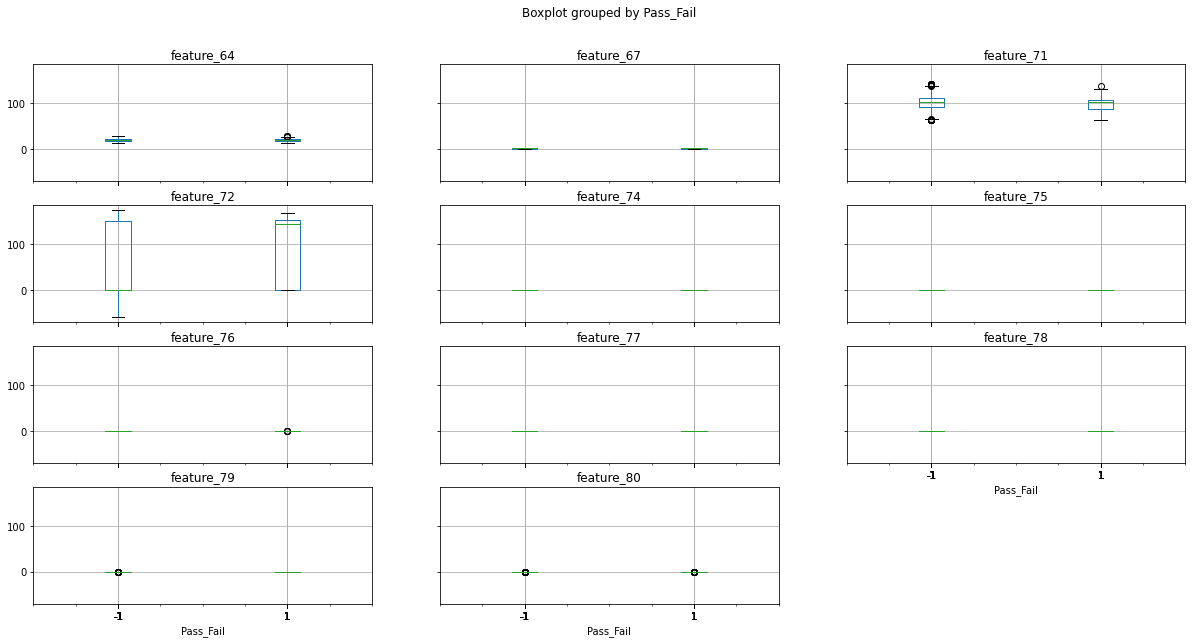

In [49]:
#Plotting sample boxplot to check if outliers are removed or not
#They are removed from the boxplots so we can now go for PCA
pd_data2.boxplot(column = ['feature_64',
'feature_67',
'feature_71',
'feature_72',
'feature_74',
'feature_75',
'feature_76',
'feature_77',
'feature_78',
'feature_79',
'feature_80'
], by='Pass_Fail', figsize = (20,10));

In [50]:
#Drop columns with very low standard deviation thresholds 
threshold = 0.2
pd_data.drop(pd_data.std()[pd_data.std() < threshold].index.values, axis=1)

feature_0  feature_1  feature_2  feature_3  feature_4  feature_14  feature_15  feature_16  feature_21  feature_23  feature_24  feature_28  feature_29  feature_32  feature_33  feature_40  feature_41  feature_43  feature_45  feature_59  feature_60  feature_62  feature_63  feature_64  feature_71  feature_72  feature_83  feature_88  feature_90  feature_109  feature_112  feature_115  feature_117  feature_122  feature_129  feature_134  feature_135  feature_136  feature_137  feature_138  feature_139  feature_142  feature_150  feature_151  feature_159  feature_160  feature_161  feature_162  feature_166  feature_167  feature_180  feature_182  feature_183  feature_188  feature_200  feature_201  feature_208  feature_218  feature_223  feature_225  feature_250  feature_268  feature_269  feature_345  feature_418  feature_419  feature_423  feature_432  feature_433  feature_438  feature_460  feature_468  feature_472  feature_476  feature_482  feature_483  feature_484  feature_485  feature_486  \
0       3030.93    2564.00  2187.7333  1411.1265     1.3602      7.9558    414.8710     10.0433    -5419.00    -4043.75      751.00     64.2333      2.0222     83.3971      9.5126       78.27       3.070    352.7173    130.3691     -1.7264    350.9264    108.6427     16.1445     21.7264     84.0793      0.0000      7.2163   1747.6049   8671.9301       0.0000       0.0000     748.6115      58.4306        2.639      -0.0473      39.2373        123.0        111.3         75.2      46.2000     350.6710         6.78        4.271       10.284       1017.0        437.0       1066.0        368.0          2.0          0.9        20.95        12.49       16.713       65.363        10.30         5.38       97.314       3.4789     175.2173     944.9004     103.0936       17.977       4.5152       0.0000     525.0965       0.0000      53.6840      26.3617      49.0013      44.5055      29.9394     311.6377      63.7987      31.9893     613.3069     291.4842     494.6996     178.1759     843.1138   
1       3095.78    2465.14  2230.4222  1463.6606     0.8294     10.1548    414.7347      9.2599    -5441.50    -3498.75    -1640.25     68.4222      2.2667     84.9052      8.7696       78.25       2.773    352.2445    133.1727      0.8073    352.0073    113.9800     10.9036     19.1927     82.3494      0.0000      6.8043   1809.2492   8407.0299       0.0000       0.0000     731.2517      58.6680        2.541      -0.0946      37.9213         98.0         80.3         81.0      56.2000     219.7679         5.70        6.285       13.077        568.0         59.0        297.0       3277.0          2.2          1.1        17.99        10.14       16.358       82.986        17.21         3.74       73.154       3.9578     128.4285     944.9004     103.0936       29.743       3.6327       0.0000       0.0000     368.9713      61.8918       8.4887     199.7866      48.5294      40.4475     463.2883      73.5536      30.8643       0.0000     246.7762       0.0000     359.0444     130.6350   
2       2932.61    2559.94  2186.4111  1698.0172     1.5102      9.5157    416.7075      9.3144    -5447.75    -4047.00    -1916.50     67.1333      2.3333     84.7569      8.6590       78.27       3.070    364.3782    131.8027      0.9091    364.5364    115.6273     11.3019     16.1755     84.7681    140.6972      7.1041   1809.2492   9317.1698       0.0000       0.4684     718.5777      58.4808        2.882      -0.1892      42.0579         89.0        126.4         96.5      45.1001     306.0380         8.33        4.819        8.443        562.0        788.0        759.0       2100.0          2.1          1.4        17.78        13.31       22.912       60.110        16.73         5.09       79.618       2.4266     182.4956     839.6006     104.4042       29.621       3.9133       0.0000       0.0000       0.0000      50.6425      18.7546     109.5747      60.0000      32.3594      21.3645     148.0287      13.3923     434.2674     151.7665       0.0000     190.3869     746.9150   
3 

In [51]:
pd_data.shape

(1567, 201)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
scaler.fit(pd_data)

MinMaxScaler()

In [54]:
#pd_data_scaled = scaler.transform(pd_data)
pd_data_scaled = pd_data.copy()

In [55]:
pd_data_scaled[pd_data_scaled.columns] = scaler.fit_transform(pd_data[pd_data.columns])

In [56]:
pd_data_scaled.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_8  feature_9  feature_10  feature_11  feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  feature_23  feature_24  feature_25  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_47  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  feature_99  feature_100  feature_102  feature_103  feature_107  feature_108  feature_109  feature_112  feature_113  feature_114  feature_115  feature_116  feature_117  feature_118  feature_119  feature_120  feature_121  feature_122  feature_126  feature_129  \
0   0.567945   0.757537   0.386412   0.508999   0.506379   0.613169   0.796029    0.388235    0.017588    0.399620    0.557580    0.602803    0.546029    0.429889    0.624450    0.386614    0.586347    0.010759    0.109058    0.284778    0.615182    0.015046    0.983532    0.255668    0.432393    0.426685    0.357988    0.718722    0.315541    0.739658    0.450820    0.256656    0.295745    0.190506    0.636290    0.582540    0.360779    0.259274    0.253214         0.0    0.740397    0.551546    0.699255    0.412881    0.325617    0.589692    0.472851    0.420727    0.377026    0.437838         0.0    0.409556    0.224684    0.163067    0.501044    0.400465    0.458396    0.477778    0.513158         0.6    0.333333    0.338728     0.636364     0.475013     0.470588     0.487779     0.496289          0.0     0.000000     0.497475          0.0     0.485511     0.641026     0.455515     0.553571     0.922559     0.667822     0.722222     0.150356     0.473054     0.631402   
1   0.819731   0.365873   0.776581   0.547194   0.110348   0.600823   0.494585    0.052941    0.449749    0.597420    0.553996    0.121274    0.316081    0.059041    0.611258    0.580634    0.301454    0.826431    0.398615    0.430504    0.346336    0.429872    0.411774    0.209674    0.430947    0.291439    0.340999    0.498500    0.398678    0.716037    0.434426    0.412298    0.338555    0.395880    0.328124    0.419792    0.841817    0.237604    0.253214         0.0    0.521854    0.557437    0.571695    0.336400    0.453704    0.526774    0.058824    0.467904    0.178261    0.643243         0.0    0.313311    0.870253    0.492679    0.535491    0.222970    0.458396    0.266667    0.526316         0.4    0.666667    0.392486     0.090909     0.087584     0.470588     0.761247     0.227058          0.0     0.000000     0.409091          0.0     0.378846     0.487179     0.525686     0.396429     0.676768     0.494002     0.722222     0.118600     0.516168     0.614649   
2   0.186209   0.741452   0.374327   0.717580   0.618294   0.433048   0.577617    0.526471    0.419598    0.539933    0.605872    0.154773    0.630581    0.608856    0.607593    0.385457    0.268541    0.856679    0.309520    0.470199    0.824723    0.389080    0.326664    0.756640    0.432393    0.426685    0.776992    0.259976    0.358053    0.729443    0.483607    0.418552    0.834774    0.459266    0.351544    0.225986    0.252890    0.267902    0.852204         0.0    0.470199    0.463181    0.519553    0.711903    0.370370    0.551539    0.500000    0.676721    0.322897    0.664865         0.0    0.844369    0.825949    0.492679    0.141962    0.832804    0.667549    0.500000    0.355263         0.4    1.000000    0.483815     1.000000     0.544049     0.470588     0.381155     0.286100          0.0     0.958854     0.507576          0.0     0.300972     0.410256     0.470354     0.600000     0.814815     0.864836     0.777778     0.229099     0.902994     0.581143   
3   0.404061   0.424349   0.489692   0.144511  

In [57]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(pd_data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 4.22330564e-02 -6.51996541e-03  4.58510110e-04 ... -7.19655384e-04
  -9.79459440e-04 -4.59963484e-04]
 [-6.51996541e-03  4.07798042e-02 -4.89425605e-05 ... -2.98441028e-03
   2.08445854e-03  1.00694656e-03]
 [ 4.58510110e-04 -4.89425605e-05  4.25796723e-02 ... -6.28809783e-03
  -1.11897014e-03  1.62588425e-04]
 ...
 [-7.19655384e-04 -2.98441028e-03 -6.28809783e-03 ...  1.09848552e-01
  -1.28614874e-03 -1.49092933e-03]
 [-9.79459440e-04  2.08445854e-03 -1.11897014e-03 ... -1.28614874e-03
   8.94993113e-02 -2.79719276e-03]
 [-4.59963484e-04  1.00694656e-03  1.62588425e-04 ... -1.49092933e-03
  -2.79719276e-03  8.52851568e-02]]


In [58]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.00220627 -0.01375085  0.01294987 ...  0.          0.
   0.        ]
 [-0.00036034  0.00208344 -0.02146521 ...  0.          0.
   0.        ]
 [-0.0037338   0.04310841 -0.02637412 ...  0.          0.
   0.        ]
 ...
 [-0.04276398 -0.15760053  0.09717086 ...  0.          0.
   0.        ]
 [ 0.01189286  0.01077221 -0.05926051 ...  0.          0.
   0.        ]
 [ 0.01856457 -0.01372331  0.03071493 ...  0.          0.
   0.        ]]

 Eigen Values 
%s [0.66905758 0.25919648 0.20726377 0.17934894 0.17534303 0.17304736
 0.1591503  0.14006958 0.13491274 0.13117733 0.12418365 0.12108628
 0.11676578 0.11332137 0.11316268 0.11059623 0.10573885 0.10213058
 0.09940289 0.09651983 0.09697628 0.09361273 0.09119899 0.09167921
 0.08954085 0.08774325 0.08627442 0.08559438 0.08484586 0.08194702
 0.08112987 0.08086539 0.08056178 0.07839644 0.07649868 0.07460765
 0.07362157 0.07320303 0.07236806 0.07105105 0.07163262 0.00314807
 0.0048799  0.06919268 0.0683444  0.06763646 0.066

In [59]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  6.70638673   9.30447675  11.38201239  13.17974016  14.93731412
  16.67187715  18.26714114  19.671147    21.02346264  22.33833593
  23.58310712  24.79683137  25.96724857  27.10314023  28.23744124
  29.34601714  30.40590443  31.42962377  32.42600172  33.39805626
  34.36553545  35.30387499  36.22283364  37.13697876  38.03450327
  38.91400924  39.77879223  40.63675875  41.48722244  42.30862914
  43.12184504  43.93240997  44.73993162  45.52574868  46.29254324
  47.04038287  47.77833841  48.51209859  49.23748932  49.95550834
  50.66769794  51.36125993  52.046319    52.72428193  53.38625605
  54.03819896  54.67641611  55.30509859  55.92852685  56.54546976
  57.15851018  57.76762913  58.36786761  58.95660395  59.53495517
  60.11051707  60.67996516  61.24517244  61.80672638  62.35996284
  62.90688871  63.45003479  63.98662626  64.51481572  65.03631354
  65.55484844  66.06312658  66.56980279  67.06824716  67.56257802
  68.05613496  68.54129819  69.02164393  69.49

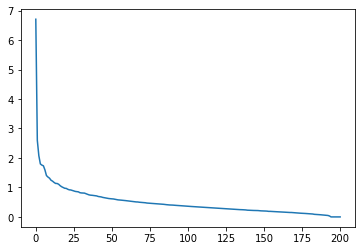

In [60]:
plt.plot(var_exp)

In [61]:
# Ploting we see that PCA is not giving us much benefit
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [62]:
#result_z.describe().transpose()

In [63]:
#Let us scale the data before plotting histogram or boxplot
#This will help us visualize better since there are more than 200 variables
#from scipy.stats import zscore
#result2 = result.drop("Time",axis=1)
#result3 = result2.drop("Pass_Fail",axis=1)
#result_z = pd_data.apply(zscore)
#result_z = pd.DataFrame(result_z , columns  = result_z.columns)
#result_z.describe().transpose()

In [64]:
result_z2 = pd_data_scaled

In [65]:
#Copy over the target column to the scaled datasets
result_z2["Pass_Fail"] = result["Pass_Fail"]

In [66]:
#Check the shape of result_z dataset
#It has 1,567 rows and 202 columns
result_z2.shape

(1567, 202)

In [67]:
result_z2.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_8  feature_9  feature_10  feature_11  feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  feature_23  feature_24  feature_25  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_47  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  feature_99  feature_100  feature_102  feature_103  feature_107  feature_108  feature_109  feature_112  feature_113  feature_114  feature_115  feature_116  feature_117  feature_118  feature_119  feature_120  feature_121  feature_122  feature_126  feature_129  \
0   0.567945   0.757537   0.386412   0.508999   0.506379   0.613169   0.796029    0.388235    0.017588    0.399620    0.557580    0.602803    0.546029    0.429889    0.624450    0.386614    0.586347    0.010759    0.109058    0.284778    0.615182    0.015046    0.983532    0.255668    0.432393    0.426685    0.357988    0.718722    0.315541    0.739658    0.450820    0.256656    0.295745    0.190506    0.636290    0.582540    0.360779    0.259274    0.253214         0.0    0.740397    0.551546    0.699255    0.412881    0.325617    0.589692    0.472851    0.420727    0.377026    0.437838         0.0    0.409556    0.224684    0.163067    0.501044    0.400465    0.458396    0.477778    0.513158         0.6    0.333333    0.338728     0.636364     0.475013     0.470588     0.487779     0.496289          0.0     0.000000     0.497475          0.0     0.485511     0.641026     0.455515     0.553571     0.922559     0.667822     0.722222     0.150356     0.473054     0.631402   
1   0.819731   0.365873   0.776581   0.547194   0.110348   0.600823   0.494585    0.052941    0.449749    0.597420    0.553996    0.121274    0.316081    0.059041    0.611258    0.580634    0.301454    0.826431    0.398615    0.430504    0.346336    0.429872    0.411774    0.209674    0.430947    0.291439    0.340999    0.498500    0.398678    0.716037    0.434426    0.412298    0.338555    0.395880    0.328124    0.419792    0.841817    0.237604    0.253214         0.0    0.521854    0.557437    0.571695    0.336400    0.453704    0.526774    0.058824    0.467904    0.178261    0.643243         0.0    0.313311    0.870253    0.492679    0.535491    0.222970    0.458396    0.266667    0.526316         0.4    0.666667    0.392486     0.090909     0.087584     0.470588     0.761247     0.227058          0.0     0.000000     0.409091          0.0     0.378846     0.487179     0.525686     0.396429     0.676768     0.494002     0.722222     0.118600     0.516168     0.614649   
2   0.186209   0.741452   0.374327   0.717580   0.618294   0.433048   0.577617    0.526471    0.419598    0.539933    0.605872    0.154773    0.630581    0.608856    0.607593    0.385457    0.268541    0.856679    0.309520    0.470199    0.824723    0.389080    0.326664    0.756640    0.432393    0.426685    0.776992    0.259976    0.358053    0.729443    0.483607    0.418552    0.834774    0.459266    0.351544    0.225986    0.252890    0.267902    0.852204         0.0    0.470199    0.463181    0.519553    0.711903    0.370370    0.551539    0.500000    0.676721    0.322897    0.664865         0.0    0.844369    0.825949    0.492679    0.141962    0.832804    0.667549    0.500000    0.355263         0.4    1.000000    0.483815     1.000000     0.544049     0.470588     0.381155     0.286100          0.0     0.958854     0.507576          0.0     0.300972     0.410256     0.470354     0.600000     0.814815     0.864836     0.777778     0.229099     0.902994     0.581143   
3   0.404061   0.424349   0.489692   0.144511  

In [68]:
%matplotlib inline


# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [ ]:
#result_z2.dropyear 	month 	date 	week_day 	hour

In [71]:
# separating the dependent and independent data

x = result_z2.iloc[:,:201]
y = result_z2["Pass_Fail"]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 201)
shape of y: (1567,)


In [76]:
def makeOverSamplesADASYN(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import ADASYN 
 sm = ADASYN()
 X, y = sm.fit_sample(X, y)
 return(X,y)

In [77]:
x_samp, y_samp = makeOverSamplesADASYN(x, y)

In [83]:
y_samp.head().unique()

array([-1,  1])

In [78]:
# splitting them into train test and split
# 70% data is for training and 30% is for test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_samp, y_samp, test_size = 0.3, random_state = 0)

# getting the shapes - 70:30 split
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (2029, 201)
shape of x_test:  (870, 201)
shape of y_train:  (2029,)
shape of y_test:  (870,)


In [79]:
y_train.head()

453    -1
1240   -1
1780    1
700    -1
2892    1
Name: Pass_Fail, dtype: int64

In [80]:
x_train.head()

feature_0  feature_1  feature_2  feature_3  feature_4  feature_8  feature_9  feature_10  feature_11  feature_14  feature_15  feature_16  feature_19  feature_20  feature_21  feature_23  feature_24  feature_25  feature_28  feature_29  feature_31  feature_32  feature_33  feature_36  feature_40  feature_41  feature_43  feature_44  feature_45  feature_47  feature_53  feature_59  feature_60  feature_62  feature_63  feature_64  feature_67  feature_71  feature_72  feature_74  feature_75  feature_76  feature_77  feature_78  feature_79  feature_80  feature_81  feature_82  feature_83  feature_84  feature_85  feature_86  feature_87  feature_88  feature_89  feature_90  feature_91  feature_92  feature_93  feature_94  feature_95  feature_99  feature_100  feature_102  feature_103  feature_107  feature_108  feature_109  feature_112  feature_113  feature_114  feature_115  feature_116  feature_117  feature_118  feature_119  feature_120  feature_121  feature_122  feature_126  feature_129  \
453    0.321944   0.586823   0.243730   0.843523   0.678952   0.571383   0.503610    0.579412    0.253769    0.400493    0.826072    0.126068    0.659818    0.293358    0.628848    0.466358    0.047090    0.881648    0.545311    0.039754    0.161044    0.651327    0.223624    0.510689    0.527838    0.044171    0.410349    0.696670    0.530663    0.822268    0.442623    0.850286    0.440879    0.841501    0.439956    0.472116    0.543095    0.644920    0.910010         0.0    0.145695    0.814433    0.442272    0.062105    0.424383    0.548862    0.314480    0.456303    0.137109    0.362162         0.0    0.712628    0.686709    0.978749    0.102296    0.870970    0.467852    0.800000    0.368421    0.400000    0.000000    0.983815     0.363636     0.555384     0.450980     0.273468     0.265182          0.0     0.952508     0.257576          0.0     0.881876     0.666667     0.696471     0.639286     0.784512     0.240736     0.722222     0.685029     0.510180     0.463838   
1240   0.356849   0.528584   0.507262   0.764878   0.403716   0.597657   0.395307    0.600000    0.761307    0.226593    0.669171    0.581044    0.580008    0.492620    0.699795    0.338110    0.494788    0.745026    0.383255    0.655620    0.389299    0.406024    0.587457    0.308357    0.443239    0.431239    0.935128    0.709871    0.339561    0.902835    0.475410    0.562799    0.957333    0.413441    0.616357    0.262420    0.446360    0.488346    0.253214         0.0    0.610596    0.624448    0.537244    0.603220    0.212963    0.587684    0.411765    0.580046    0.394008    0.491892         0.0    0.646416    0.917722    0.596177    0.381002    0.170198    0.173222    0.466667    0.539474    0.200000    0.666667    0.333526     0.909091     0.549201     0.911765     0.295430     0.236505          0.0     0.954555     0.232323          0.0     0.283679     0.589744     0.533637     0.300000     0.434343     0.419355     0.861111     0.699287     0.245509     0.597896   
1780   0.372990   0.499663   0.517492   0.440798   0.484096   0.413399   0.590620    0.380997    0.309820    0.401310    0.661794    0.423677    0.324057    0.532477    0.580209    0.466358    0.475884    0.807820    0.403865    0.562847    0.385917    0.508577    0.601643    0.576154    0.279274    0.426685    0.509307    0.278700    0.414410    0.464925    0.252756    0.569727    0.412444    0.474827    0.363614    0.558675    0.514251    0.165457    0.874335         0.0    0.294775    0.353764    0.551856    0.380206    0.608138    0.550394    0.735546    0.643728    0.491755    0.566751         0.0    0.580819    0.525598    0.478060    0.386133    0.445595    0.389843    0.700353    0.379508    0.114467    0.618442    0.292295     0.571759     0.410841     0.613143     0.307888     0.381251          0.0     0.932975     0.386621          0.0     0.312999     0.586034     0.530057     0.607228     0.367956     0.555255     0.392908     0.312632     0.322915     0.648155   
700    0.734897   0.395745   0.747537 

In [81]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-0.  0. -0. -0. -0. -0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0. -0.  0.
 -0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0.
 -0. -0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0.
 -0. -0.  0. -0.  0. -0.  0. -0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.
 -0. -0. -0.  0. -0.  0. -0.  0.  0.  0. -0. -0.  0.  0. -0. -0.  0. -0.
 -0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0.
  0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0.  0. -0. -0.  0.
 -0. -0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.  0. -0.
 -0.  0.  0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0. -0.
  0. -0.  0.  0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0.  0. -0. -0.  0.
 -0. -0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0.  0.
 -0.  0.  0.]


In [ ]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(result_z)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1))
                           / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [ ]:
# splitting them into train test and split
# 70% data is for training and 30% is for test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# getting the shapes - 70:30 split
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Return the model statistics
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    from sklearn.model_selection import cross_val_score
    
    model.fit(X_train, y_train)   # fit the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
   
    return score, mae, mse, r2  # return all the metrics


In [ ]:
#Function to display confusion matrix
def disp_confusion_matrix(model_name, model, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    df_conf_mat = pd.DataFrame(conf_mat)
    #ax = plt.axes()
    #plt.title()
    plt.figure(figsize = (10,7))
    plt.suptitle("Confusion matrix: "+model_name)
    sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')
    #ax.set_title()
    #plt.show();

In [ ]:
# Function to display roc curve and auc
def disp_roc_curve(model_name, model, X_test, y_test):    
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)
    #lr_probs = model.predict(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    #print('Random: ROC AUC=%.3f' % (ns_auc))
    print(model_name + ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label=model_name)
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [ ]:
#Install XGBoost if not installed
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Define different classifiers including Logistic Regression, Random Forest an XG Boost
#We have created a pipeline to do PCA first and then do the modeling part

#from sklearn.calibration import CalibratedClassifierCV
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(random_state=0)
#lr_model = CalibratedClassifierCV(lr) 

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline 


pipe_lr = Pipeline([('pca', PCA(n_components=10)), ('lr', LogisticRegression(random_state=1))]) 
pipe_lr.fit(x_train, y_train) 
print('Test Accuracy - Logistic Regression: %.4f' % pipe_lr.score(x_test, y_test))

pipe_rf = Pipeline([('pca', PCA(n_components=10)), ('rf', RandomForestClassifier(n_estimators=50,
                                                                                random_state=1))]) 
pipe_rf.fit(x_train, y_train) 
print('Test Accuracy - Random Forest: %.4f' % pipe_rf.score(x_test, y_test)) 

pipe_xgb = Pipeline([('pca', PCA(n_components=10)), ('xg',XGBClassifier(random_state=1))]) 
pipe_xgb.fit(x_train, y_train) 
print('Test Accuracy - XG Boost: %.4f' % pipe_xgb.score(x_test, y_test)) 

#from sklearn.ensemble import StackingClassifier
#estimators = [('dt', dt),('rf', rf),('bg', bg), ('gb', gb), ('ab', ab)]
#estimators = [('lr', lr_model),('rf', rf_model),('xgb', xgb_model)]

#reg = StackingClassifier(estimators=estimators)

In [ ]:
#This javascript code disables autoscroll

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

In [ ]:
#We can see that even though Logistic and Random Forest have more accuracy, 
#they have not classified any observation in failure class correctly
#XGBoost though slightly low accuracy has classified 1 observations in the failure class correctly
for model, model_name in zip([pipe_lr,pipe_rf, pipe_xgb], ['Logistic Regression','Random Forest', 
                                                      'XG Boost']):
    disp_confusion_matrix(model_name, model, x_test, y_test);

In [ ]:
#Install imbalanced library if not installed
!pip install -U imbalanced-learn

In [ ]:
#!pip install scikit-learn==0.23.1

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import imblearn
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Count of records before oversampling
print("Before Upsampling, count of pass '-1':{}".format(sum(y_train==-1)))
print("Before Upsampling, count of pass '1':{}".format(sum(y_train==1)))

In [ ]:
def makeOverSamplesSMOTE(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import SMOTE
 sm = SMOTE()
 X, y = sm.fit_sample(X, y)
 return X,y

In [ ]:
def makeOverSamplesADASYN(X,y):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import ADASYN 
 sm = ADASYN()
 X, y = sm.fit_sample(X, y)
 return(X,y)

In [ ]:
#Use the SMOTE technique to oversample
sm = SMOTE(sampling_strategy=1,k_neighbors=5,random_state = 1)

In [ ]:
sm_x_train,sm_y_train = sm.fit_sample(x_train, y_train)

In [ ]:
# Count of records after oversampling
print("After Upsampling,counts of label '-1':{}".format(sum(sm_y_train==-1)))
print("After Upsampling,counts of label '1':{}".format(sum(sm_y_train==1)))

In [ ]:
pipe_lr2 = Pipeline([('pca', PCA(n_components=10)), ('lr', LogisticRegression(random_state=1))]) 
pipe_lr2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - Logistic Regression: %.4f' % pipe_lr2.score(x_test, y_test))

pipe_rf2 = Pipeline([('pca', PCA(n_components=10)), ('rf', RandomForestClassifier(n_estimators=50,
                                                                                random_state=1))]) 
pipe_rf2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - Random Forest: %.4f' % pipe_rf2.score(x_test, y_test)) 

pipe_xgb2 = Pipeline([('pca', PCA(n_components=10)), ('xg',XGBClassifier(random_state=1))]) 
pipe_xgb2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - XG Boost: %.4f' % pipe_xgb2.score(x_test, y_test)) 


In [ ]:
#We can see that Logistic Regression has accuracy of 73%,
#While random forest and XG Boost has much better accuracy of 87% and 86% 
#Basis on the confusion matrix we see that more observations are classified under 1 now compared to earlier
#13, 6 and 8 observation for logistic, random forest and XG boost, so Logistic is better even though 
#accuracy is lower
for model, model_name in zip([pipe_lr2,pipe_rf2, pipe_xgb2], ['Logistic Regression','Random Forest', 
                                                      'XG Boost']):
    disp_confusion_matrix(model_name, model, x_test, y_test);

In [ ]:
#Using Cluster centroids method to undersample
from collections import Counter
from imblearn.under_sampling import ClusterCentroids 
print('Original dataset shape {}'.format(Counter(y_train)))
cc = ClusterCentroids(random_state=1)
x_res, y_res = cc.fit_sample(x_train, y_train)

In [ ]:
# Count of records after downsampling
print("After Downsampling,counts of label '-1':{}".format(sum(y_res==-1)))
print("After Downsampling,counts of label '1':{}".format(sum(y_res==1)))

In [ ]:
pipe_lr3 = Pipeline([('pca', PCA(n_components=10)), ('lr', LogisticRegression(random_state=1))]) 
pipe_lr3.fit(x_res, y_res) 
print('Test Accuracy - Logistic Regression: %.4f' % pipe_lr3.score(x_test, y_test))

pipe_rf3 = Pipeline([('pca', PCA(n_components=10)), ('rf', RandomForestClassifier(n_estimators=50,
                                                                                random_state=1))]) 
pipe_rf3.fit(x_res, y_res) 
print('Test Accuracy - Random Forest: %.4f' % pipe_rf3.score(x_test, y_test)) 

pipe_xgb3 = Pipeline([('pca', PCA(n_components=10)), ('xg',XGBClassifier(random_state=1))]) 
pipe_xgb3.fit(x_res, y_res) 
print('Test Accuracy - XG Boost: %.4f' % pipe_xgb3.score(x_test, y_test)) 

In [ ]:
#We can see that Logistic Regression has accuracy of 33%,
#While random forest and XG Boost has much better accuracy of 44% and 49% 
#Basis on the confusion matrix we see that more observations are classified under 1 now compared to upsampling
#20, 17 and 17 observation for logistic, random forest and XG boost, so Logistic is better even though 
#accuracy is lower
for model, model_name in zip([pipe_lr3,pipe_rf3, pipe_xgb3], ['Logistic Regression','Random Forest', 
                                                      'XG Boost']):
    disp_confusion_matrix(model_name, model, x_test, y_test);

In [ ]:
#Try using KFold cross validation with Upsampling as we have more accuracy there
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

num_folds = 50
seed = 1

kfold = KFold(n_splits=num_folds, random_state=seed)
#model = LogisticRegression()

pipe_lr2 = Pipeline([('pca', PCA(n_components=10)), ('lr', LogisticRegression(random_state=1))]) 
pipe_lr2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - Logistic Regression: %.4f' % pipe_lr2.score(x_test, y_test))
results = cross_val_score(pipe_lr2, x, y, cv=kfold)
#print(results)
#pred = cross_val_predict(pipe_lr2,sm_x_train, sm_y_train, cv=kfold)
print("CV Accuracy - Logistic Regression: %.4f (%.4f)" % (results.mean(), results.std()))


pipe_rf2 = Pipeline([('pca', PCA(n_components=10)), ('rf', RandomForestClassifier(n_estimators=50,
                                                                                random_state=1))]) 
pipe_rf2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - Random Forest: %.4f' % pipe_rf2.score(x_test, y_test)) 
results = cross_val_score(pipe_rf2, x, y, cv=kfold)
#print(results)
#pred = cross_val_predict(pipe_lr2,sm_x_train, sm_y_train, cv=kfold)
print("CV Accuracy - Random Forest: %.4f (%.4f)" % (results.mean(), results.std()))


pipe_xgb2 = Pipeline([('pca', PCA(n_components=10)), ('xg',XGBClassifier(random_state=1))]) 
pipe_xgb2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - XG Boost: %.4f' % pipe_xgb2.score(x_test, y_test)) 
results = cross_val_score(pipe_xgb2, x, y, cv=kfold)
#print(results)
#pred = cross_val_predict(pipe_lr2,sm_x_train, sm_y_train, cv=kfold)
print("CV Accuracy - XG Boost: %.4f (%.4f)" % (results.mean(), results.std()))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from time import time

#disp_confusion_matrix(model_name, model, x_test, y_test);

In [ ]:
#Except XG Boost none of the models predicted a single observation for failure 
for model, model_name in zip([pipe_lr2,pipe_rf2, pipe_xgb2], ['Logistic Regression','Random Forest', 
                                                      'XG Boost']):
    y_pred = cross_val_predict(model, x, y, cv=kfold)
    conf_mat = confusion_matrix(y, y_pred)
    print(conf_mat)

In [ ]:
#Using Grid Search to search the hyper parameter space
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rf = RandomForestClassifier(n_estimators=50,random_state=1)                                                                             
grid_search = GridSearchCV(rf, param_grid=param_grid)
start = time()
grid_search.fit(sm_x_train, sm_y_train)

In [ ]:
#Get the best parameters for Random Forest
grid_search.best_params_

In [ ]:
#Mean Test Scores across the models
grid_search.cv_results_['mean_test_score']

In [ ]:
#Best Model Parameters
grid_search.best_estimator_

In [ ]:
#Construct RandomForest with the best model parameters
pipe_rf2 = Pipeline([('pca', PCA(n_components=10)), ('rf', RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=3,
                       n_estimators=50, random_state=1))]) 
pipe_rf2.fit(sm_x_train, sm_y_train) 
print('Test Accuracy - Random Forest: %.4f' % pipe_rf2.score(x_test, y_test))

In [ ]:
#Able to classify 6 observations correctly
disp_confusion_matrix('Random Forest - Grid Search', pipe_rf2, x_test, y_test);

In [ ]:
!pip install rfpimp

In [ ]:
#Identify which features are best in Random Forest Classifier
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(pipe_rf2, sm_x_train, sm_y_train, r2)

In [ ]:
#Get the feature importance
perm_imp_rfpimp.Importance.plot(kind="bar",figsize=(50,20))

In [ ]:
#Feature Importance is as below
perm_imp_rfpimp

In [ ]:
#Try OneClassSVM with oversampled train data with SMOTE
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(sm_x_train, sm_y_train)
y_pred = model.fit_predict(x_test)
accuracy = (len(y_pred[y_pred == -1])/len(y_pred))
print('Test Accuracy - OneClassSVM (Oversampled): %.4f' % accuracy)
#print(len(y_pred[y_pred == -1]))
#print(len(y_pred))
#print(accuracy)

In [ ]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'summer')

In [ ]:
#Try OneClassSVM with undersampled train data
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)

model.fit(x_res, y_res)
y_pred = model.fit_predict(x_test)
accuracy = (len(y_pred[y_pred == -1])/len(y_pred))
print('Test Accuracy - OneClassSVM (Undersampled): %.4f' % accuracy)

In [ ]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'summer')

In [ ]:
#We have tried Logistic Regression, Random Forest and XG Boost algorithm for the imbalanced classes
#Across methods Logisitc Regression performed the worst while Random Forest and XG Boost performed similarly
#However on the good side Logistic was able to classify more observationsin failure compared to other two
#algorithms.We have tried two sampling techniques -first one using SMOTE (oversampling) and second one 
#using centroid based method (undersampling), Oversampling gave better results than undersampling in 
#terms of accuracy. However undersampling classified more observations in minority class than oversampling
#We did Z score scaling on both the datasets and took PCA with n_components as 10
#We tried K-fold cross validation which helped improve the results a fair bit to about 93% accuracy
#However it continues misclassifying the minority class
#We used Grid search for hyper parameter tuning as well for random forest and checked results with 89% accuracy
#Using feature importance, we found that feature_64, feature_55 and feature_45 are the top three important 
#features. Lastly we tried OneClassSVM as well on the undersampled and oversampled data with similar accuracy
#of about 84%. However we were not able to achieve accuracy more than 93.4%, if we tried to improve the 
#classifier on the failure observations